# Sesion 15 Pandas


In [40]:
import pandas as pd
import numpy as np


In [41]:
dict_1={
    "Nombre":["Ringo","John","Paul","Geroge","Yoko"],
    "Edad":[45,34,42,38,47],
    "Salario":[12000,14000,13000,11000,10000],
    "Genero":["M","M","M","M","F"]
}

In [42]:
data = pd.DataFrame(dict_1)

In [43]:
data

,Nombre,Edad,Salario,Genero
0,Ringo,45,12000,M
1,John,34,14000,M
2,Paul,42,13000,M
3,Geroge,38,11000,M
4,Yoko,47,10000,F


In [44]:
data.head(2)

,Nombre,Edad,Salario,Genero
0,Ringo,45,12000,M
1,John,34,14000,M


In [45]:
data.tail(1)

,Nombre,Edad,Salario,Genero
4,Yoko,47,10000,F


In [46]:
datos_categoricos=data.select_dtypes(exclude=[np.number]) #Excluir info numerica y seleccionar el resto
print("La base contiene {0} datos categoricos".format(datos_categoricos.shape[1]))

La base contiene 2 datos categoricos


In [47]:
datos_categoricos

,Nombre,Genero
0,Ringo,M
1,John,M
2,Paul,M
3,Geroge,M
4,Yoko,F


In [48]:
data.dtypes #Tipo de datos de cada columna

Nombre     object
Edad        int64
Salario     int64
Genero     object
dtype: object

In [49]:
data.describe()

,Edad,Salario
count,5.000000,5.00000
mean,41.200000,12000.00000
std,5.263079,1581.13883
min,34.000000,10000.00000
25%,38.000000,11000.00000
50%,42.000000,12000.00000
75%,45.000000,13000.00000
max,47.000000,14000.00000


In [50]:
data.median(numeric_only=True)

Edad          42.0
Salario    12000.0
dtype: float64

In [51]:
data.count()

Nombre     5
Edad       5
Salario    5
Genero     5
dtype: int64

In [52]:
data.mean(numeric_only=True)

Edad          41.2
Salario    12000.0
dtype: float64

In [53]:
data.mode(numeric_only=True)

,Edad,Salario
0,34,10000
1,38,11000
2,42,12000
3,45,13000
4,47,14000


In [54]:
data.std(numeric_only=True)

Edad          5.263079
Salario    1581.138830
dtype: float64

In [55]:
data.sum()

Nombre     RingoJohnPaulGerogeYoko
Edad                           206
Salario                      60000
Genero                       MMMMF
dtype: object

In [56]:
data.max()

Nombre      Yoko
Edad          47
Salario    14000
Genero         M
dtype: object

In [57]:
data.min()

Nombre     Geroge
Edad           34
Salario     10000
Genero          F
dtype: object

In [58]:
data[data["Edad"]==data["Edad"].min()]

,Nombre,Edad,Salario,Genero
1,John,34,14000,M


In [59]:
data["Edad"].abs()

0    45
1    34
2    42
3    38
4    47
Name: Edad, dtype: int64

In [60]:
data.prod(numeric_only=True)

Edad                114768360
Salario    432327041775828992
dtype: int64

In [61]:
data.cumsum()

,Nombre,Edad,Salario,Genero
0,Ringo,45,12000,M
1,RingoJohn,79,26000,MM
2,RingoJohnPaul,121,39000,MMM
3,RingoJohnPaulGeroge,159,50000,MMMM
4,RingoJohnPaulGerogeYoko,206,60000,MMMMF


In [62]:
data["Edad"].cumprod()

0           45
1         1530
2        64260
3      2441880
4    114768360
Name: Edad, dtype: int64

In [63]:
data

,Nombre,Edad,Salario,Genero
0,Ringo,45,12000,M
1,John,34,14000,M
2,Paul,42,13000,M
3,Geroge,38,11000,M
4,Yoko,47,10000,F


In [64]:
data2=pd.get_dummies(data[["Genero"]])
data2

,Genero_F,Genero_M
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [65]:
data2.value_counts()

Genero_F  Genero_M
0         1           4
1         0           1
dtype: int64

# Graficas

array([[<AxesSubplot:title={'center':'Edad'}>,
        <AxesSubplot:title={'center':'Salario'}>]], dtype=object)

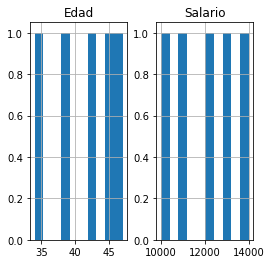

In [66]:
data.hist(figsize=(4,4))

In [67]:
#!pip install matplotlib

<AxesSubplot:>

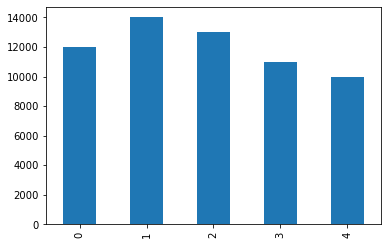

In [68]:
data["Salario"].plot(kind = "bar") #Scatter - bar - barh - box - pie

<AxesSubplot:xlabel='Nombre'>

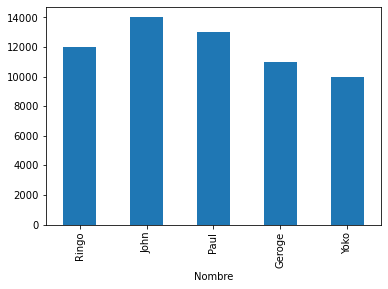

In [69]:
data.set_index("Nombre", inplace=True)
data["Salario"].plot(kind = "bar")

<AxesSubplot:ylabel='Nombre'>

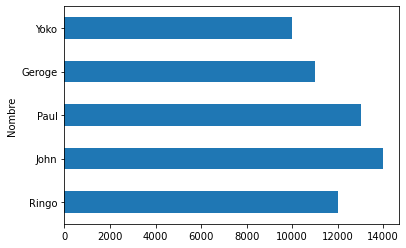

In [70]:
data["Salario"].plot(kind = "barh")

<AxesSubplot:>

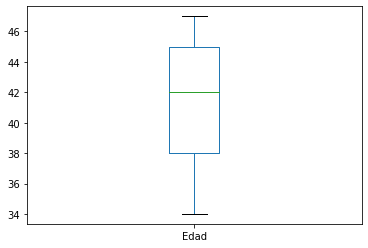

In [71]:
data["Edad"].plot(kind = "box")
# La linea del centro es la media, los extremos de la caja son los cuartiles (abajo 1 y arriba 3)
# La linea delgada del centro representa la distribución

In [72]:
datasort = data.sort_values("Salario", ascending=False)
datasort

,Edad,Salario,Genero
Nombre,,,
John,34,14000,M
Paul,42,13000,M
Ringo,45,12000,M
Geroge,38,11000,M
Yoko,47,10000,F


<AxesSubplot:ylabel='Nombre'>

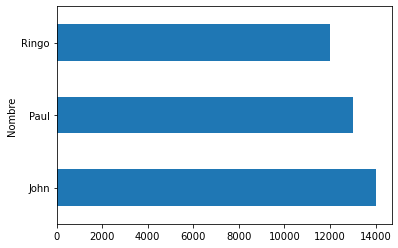

In [73]:
datasort["Salario"].head(3).plot(kind="barh")

#  Actividad: Gráfica Medallas

In [74]:
medallas = pd.read_csv("athlete_events.csv")

In [75]:
medallas = medallas[medallas["Medal"].notna()]

<AxesSubplot:>

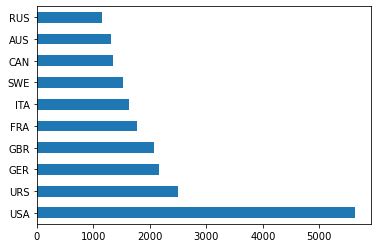

In [76]:
medallas["NOC"].value_counts().head(10).plot(kind="barh")

<AxesSubplot:>

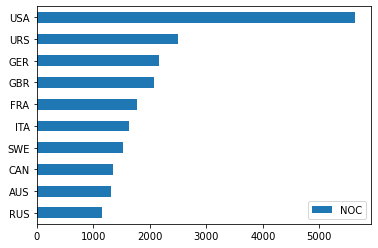

In [77]:
medallas["NOC"].value_counts().head(10).sort_values(ascending=True).plot(kind="barh",legend=True)

In [78]:
#medallas_pais = medallas[["NOC","Medal"]]
#medallas_pais["Total"] = medallas_pais["Medal"].values_count()

#medallas_pais.set_index("NOC", inplace=True)
#medallas_pais


# Fin Actividad: Gráfica Medallas


In [79]:
data_ol = pd.read_csv("athlete_events.csv")

In [80]:
ejer_clase = data_ol[["Year","Season","Medal","NOC"]]
ejer_clase

,Year,Season,Medal,NOC
0,1992,Summer,NaN,CHN
1,2012,Summer,NaN,CHN
2,1920,Summer,NaN,DEN
3,1900,Summer,Gold,DEN
4,1988,Winter,NaN,NED
...,...,...,...,...
271111,1976,Winter,NaN,POL
271112,2014,Winter,NaN,POL
271113,2014,Winter,NaN,POL
271114,1998,Winter,NaN,POL


In [81]:
dummies=pd.get_dummies(ejer_clase[["Medal"]])
dummies.head()

,Medal_Bronze,Medal_Gold,Medal_Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


In [82]:
concatendado = pd.concat([ejer_clase, dummies], axis=1)
concatendado.head()

,Year,Season,Medal,NOC,Medal_Bronze,Medal_Gold,Medal_Silver
0,1992,Summer,NaN,CHN,0,0,0
1,2012,Summer,NaN,CHN,0,0,0
2,1920,Summer,NaN,DEN,0,0,0
3,1900,Summer,Gold,DEN,0,1,0
4,1988,Winter,NaN,NED,0,0,0


In [83]:
agrupado = concatendado.groupby(["Year","Medal","Season"]).sum()
agrupado.head()

Medal_Bronze  Medal_Gold  Medal_Silver
Year Medal  Season                                        
1896 Bronze Summer          38.0         0.0           0.0
     Gold   Summer           0.0        62.0           0.0
     Silver Summer           0.0         0.0          43.0
1900 Bronze Summer         175.0         0.0           0.0
     Gold   Summer           0.0       201.0           0.0

In [84]:
pearson= agrupado.corr()
pearson.style.background_gradient(cmap="coolwarm")
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

,Medal_Bronze,Medal_Gold,Medal_Silver
Medal_Bronze,1.000000,-0.258015,-0.257368
Medal_Gold,-0.258015,1.000000,-0.263463
Medal_Silver,-0.257368,-0.263463,1.000000


In [85]:
pearson= agrupado.corr()
pearson.style.background_gradient(cmap="viridis")
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

,Medal_Bronze,Medal_Gold,Medal_Silver
Medal_Bronze,1.000000,-0.258015,-0.257368
Medal_Gold,-0.258015,1.000000,-0.263463
Medal_Silver,-0.257368,-0.263463,1.000000


In [86]:
pearson=data.corr()
pearson.style.background_gradient(cmap="Spectral")

,Edad,Salario
Edad,1.000000,-0.660926
Salario,-0.660926,1.000000


In [87]:
agrupado["Total_Medals"] = agrupado["Medal_Gold"] + agrupado["Medal_Silver"] + agrupado["Medal_Bronze"]
agrupado.head()

Medal_Bronze  Medal_Gold  Medal_Silver  Total_Medals
Year Medal  Season                                                      
1896 Bronze Summer          38.0         0.0           0.0          38.0
     Gold   Summer           0.0        62.0           0.0          62.0
     Silver Summer           0.0         0.0          43.0          43.0
1900 Bronze Summer         175.0         0.0           0.0         175.0
     Gold   Summer           0.0       201.0           0.0         201.0

<AxesSubplot:xlabel='Year,Medal,Season'>

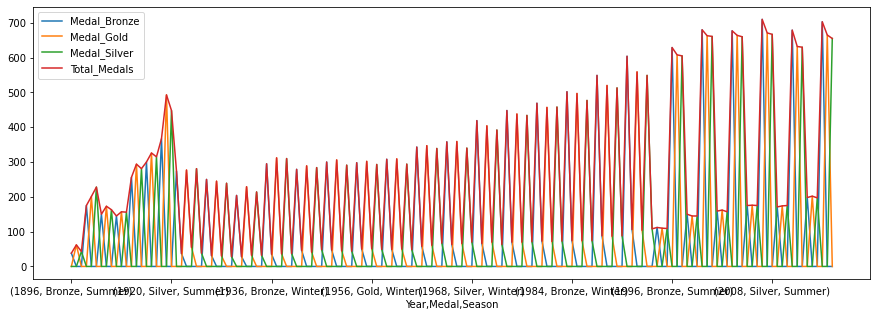

In [88]:
agrupado.plot(figsize=(15,5))
# La grafica se ve muy fea

In [89]:
temporadas_4 = agrupado[:12]
temporadas_4

Medal_Bronze  Medal_Gold  Medal_Silver  Total_Medals
Year Medal  Season                                                      
1896 Bronze Summer          38.0         0.0           0.0          38.0
     Gold   Summer           0.0        62.0           0.0          62.0
     Silver Summer           0.0         0.0          43.0          43.0
1900 Bronze Summer         175.0         0.0           0.0         175.0
     Gold   Summer           0.0       201.0           0.0         201.0
     Silver Summer           0.0         0.0         228.0         228.0
1904 Bronze Summer         150.0         0.0           0.0         150.0
     Gold   Summer           0.0       173.0           0.0         173.0
     Silver Summer           0.0         0.0         163.0         163.0
1906 Bronze Summer         145.0         0.0           0.0         145.0
     Gold   Summer           0.0       157.0           0.0         157.0
     Silver Summer           0.0         0.0         156.0         156.0

<AxesSubplot:xlabel='Year,Medal,Season'>

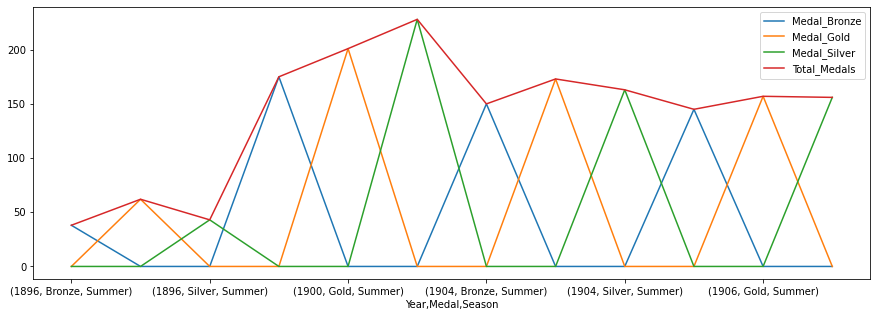

In [90]:
temporadas_4.plot(figsize=(15,5))

<AxesSubplot:xlabel='Year,Medal,Season'>

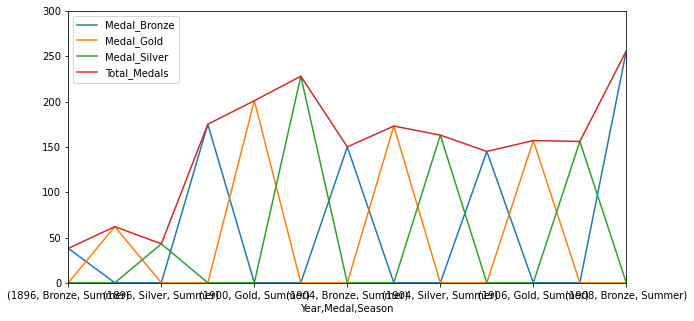

In [91]:
agrupado.plot(figsize=(10,5), xlim=(0,12), ylim=(0,300))

In [92]:
import matplotlib.pyplot as plt

In [93]:
def labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

In [94]:
x = ["Ringo","John","Paul","Geroge","Yoko"]
y = [45,34,42,38,47]

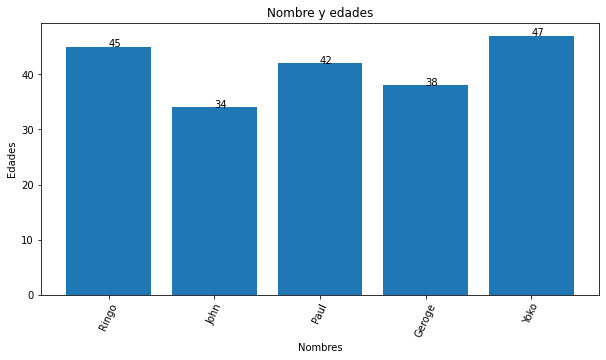

In [95]:
plt.figure(figsize=(10,5))
plt.bar(x,y)
labels(x,y)
plt.title("Nombre y edades")
plt.xlabel("Nombres")
plt.ylabel("Edades")
plt.xticks(rotation=65)
plt.show()

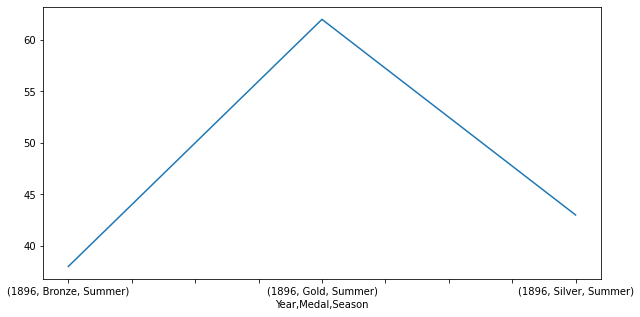

In [96]:
ax = agrupado[:3]["Total_Medals"].plot(figsize=(10,5))
fig = ax.get_figure()
fig.savefig("Grafica")

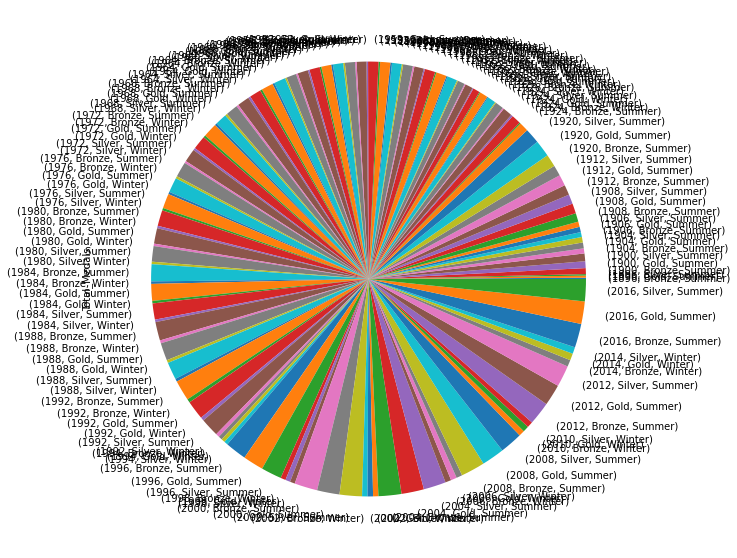

In [97]:
pie_plot = agrupado["Total_Medals"].plot.pie(figsize=(10,10))

In [98]:
cantidad = agrupado["Total_Medals"][:3].unique()
cantidad

array([38., 62., 43.])

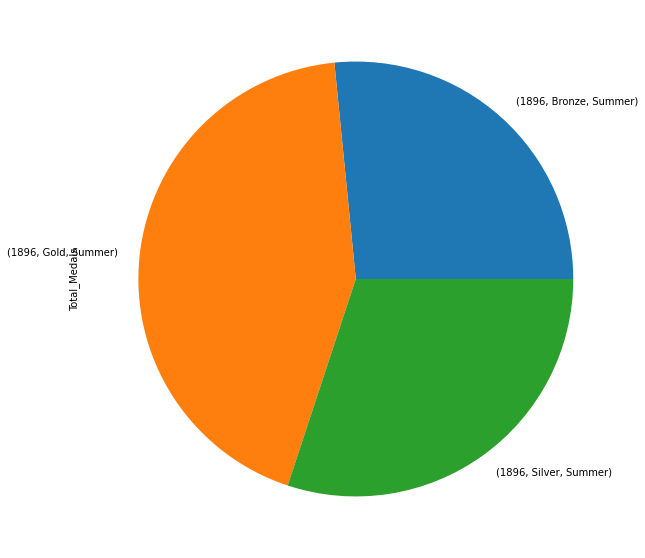

In [99]:
pie2 = agrupado["Total_Medals"][:3].plot.pie(figsize=(10,10))


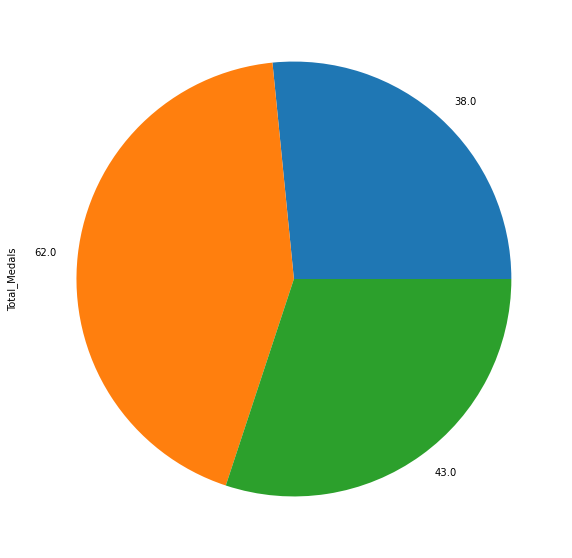

In [100]:
pie2 = agrupado["Total_Medals"][:3].plot.pie(figsize=(10,10),labels=cantidad)

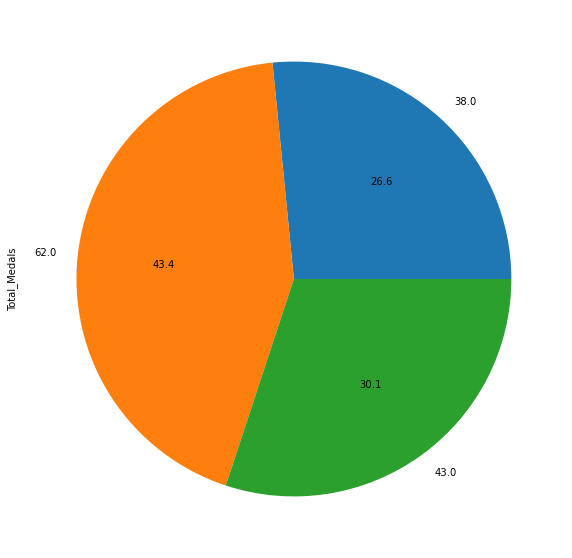

In [102]:
pie2 = agrupado["Total_Medals"][:3].plot.pie(figsize=(10,10),labels=cantidad, autopct="%0.1f")

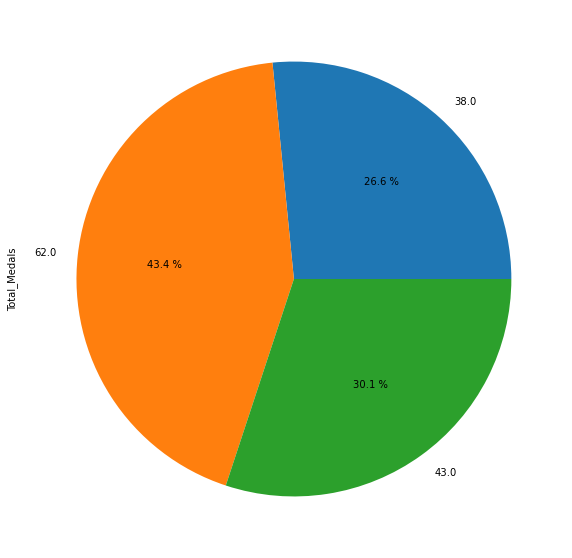

In [103]:
pie2 = agrupado["Total_Medals"][:3].plot.pie(figsize=(10,10),labels=cantidad, autopct="%0.1f %%")

In [104]:
agrupado["Total_Medals"][:3]

Year  Medal   Season
1896  Bronze  Summer    38.0
      Gold    Summer    62.0
      Silver  Summer    43.0
Name: Total_Medals, dtype: float64

In [105]:
nombres = ["Bronce","Oro","Plata"]


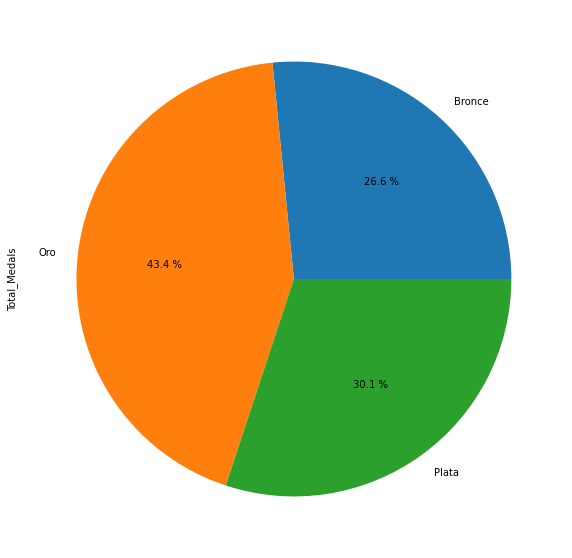

In [106]:
pie2 = agrupado["Total_Medals"][:3].plot.pie(figsize=(10,10),labels=nombres, autopct="%0.1f %%")

In [107]:
agrupado.tail()

Medal_Bronze  Medal_Gold  Medal_Silver  Total_Medals
Year Medal  Season                                                      
2014 Gold   Winter           0.0       202.0           0.0         202.0
     Silver Winter           0.0         0.0         197.0         197.0
2016 Bronze Summer         703.0         0.0           0.0         703.0
     Gold   Summer           0.0       665.0           0.0         665.0
     Silver Summer           0.0         0.0         655.0         655.0